In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#train_df = pd.read_csv("pendigits/pendigits.tra", sep=",", header=None)
#train_df.shape
#X = train_df.iloc[:,:16]
#Y = train_df.iloc[:,16:]
#print(X.head())
#print(Y.head())

In [71]:
from sklearn import datasets
digits = datasets.load_digits()

In [25]:
number = train_df.iloc[0:1,:16].values
number.reshape((4,4))

array([[ 47, 100,  27,  81],
       [ 57,  37,  26,   0],
       [  0,  23,  56,  53],
       [100,  90,  40,  98]])

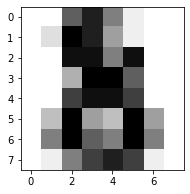

In [72]:
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
import numpy as np
from sklearn.preprocessing import scale
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

digits = datasets.load_digits()
data = scale(digits.data)
n_digits= len(np.unique(digits.target))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.3, random_state=42)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
kmeans.labels_

array([1, 6, 4, ..., 0, 6, 0], dtype=int32)

In [7]:
from sklearn import metrics
metrics.completeness_score(y_train, kmeans.labels_) * 100

61.330953549170154

In [8]:
#kmeans.predict(X_test)

In [9]:
from sklearn.svm import SVC
model = SVC(kernel='linear', gamma='auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9777777777777777

In [11]:
clusterCenters = kmeans.cluster_centers_

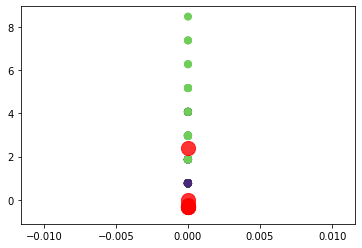

In [16]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(clusterCenters[:, 0], clusterCenters[:, 1], c='red', s=200, alpha=0.8);